In [1]:
from utils.dataset_utils import load_data, check_img, prepare_data
from utils.training_utils import build_model, build_model_late_fusion
from utils.format_utils import print_separator

import os
import warnings
import random
import numpy as np
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications.efficientnet_v2 import EfficientNetV2S
from keras.utils import to_categorical

In [2]:
np.set_printoptions(precision=2)  

In [3]:
data_path = './Data/Kinect-clean'
model_path = './models/Test_300_RGBD.h5'

In [4]:
emotions_dict = {
    "Colere": 0,
    "Degout": 1,
    "Joie": 2,
    "Neutralite": 3,
    "Peur": 4,
    "Surprise": 5,
    "Tristesse": 6
}

emotions_dict_inv = {v:k for k, v in emotions_dict.items()}

In [5]:
imgs_rgb, imgs_depth, labels = load_data(data_path)

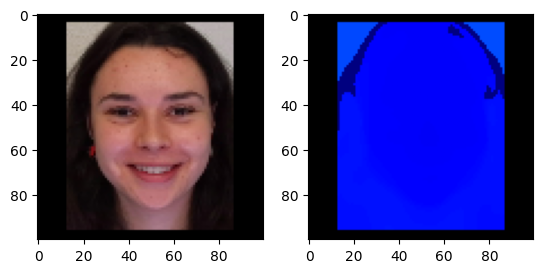

In [7]:
idx = 900
plt.subplot(121)
plt.imshow(imgs_rgb[idx])
plt.subplot(122)
plt.imshow(imgs_depth[idx])

In [8]:
backbone, classifier = build_model_late_fusion(model_path, print_summary=True)

Backbone : 
Model: "Backbone"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 efficientnetv2-s (Function  (None, 1280)              20331360  
 al)                                                             
                                                                 
Total params: 20331360 (77.56 MB)
Trainable params: 20177488 (76.97 MB)
Non-trainable params: 153872 (601.06 KB)
_________________________________________________________________
Classifier : 
Model: "Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1280)]            0         
                                                                 
 dense (Dense)               (N

In [17]:
idx = 100
rgb_test = imgs_rgb[idx]
depth_test = imgs_depth[idx]

In [18]:
fm_rgb = backbone.predict(rgb_test.reshape((-1, 100, 100, 3)))

1/1 [==============================] - 0s 55ms/step


In [20]:
print(fm_rgb)

[[ 4.26e-03  2.54e-02  4.52e-02 ... -7.96e-02  5.36e+00  1.01e+00]]


In [22]:
output = classifier.predict(fm_rgb)

1/1 [==============================] - 0s 21ms/step


In [23]:
print(output)

[[0.02 0.   0.62 0.23 0.05 0.05 0.03]]
